# Impact of COVID-19 on Students- EDA

## About data set :
COVID-19 has brough the whole world at standstill.The economy drop, many people are getting jobless and many dangerous impacts have been seen due to the affect of Pandemic. There is another domain which are heavliy affected by it i.e the Students Life due to COVID-19.

## Problem Statement :
 - Students lifestyle has changed dramatically.
 - Many students are having stress,health and weight issues dure to this Pandemic.Here we are trying to understand the impact of    COVID-19 on students based on a small data with few samples.

## Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [2]:
df = pd.read_csv("COVID-19 Survey Student Responses.csv")

In [3]:
df.head(50)

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
5,R6,Delhi-NCR,21,0.0,Very poor,Smartphone,6.0,0.0,5.0,1.0,Youtube,0,1,Decreased,YES,Coding and studying for exams,NO,YES,School/college
6,R7,Delhi-NCR,19,2.0,Very poor,Smartphone,2.0,1.0,5.0,4.0,Instagram,0,3,Increased,NO,Watching web series,NO,YES,"Friends , relatives"
7,R8,Outside Delhi-NCR,19,2.0,Very poor,Tablet,1.0,1.0,10.0,5.0,Instagram,0,3,Increased,YES,Scrolling through social media,NO,YES,Eating outside
8,R9,Delhi-NCR,21,3.0,Very poor,Laptop/Desktop,4.0,1.0,8.0,2.0,Whatsapp,1,3,Increased,NO,Online surfing,NO,NO,"Friends , relatives"
9,R10,Outside Delhi-NCR,20,0.0,Very poor,Laptop/Desktop,1.0,0.5,8.0,5.0,Instagram,3,3,Decreased,YES,live stream watching,NO,NO,School/college


 - A cross-sectional survey is conducted with a students of different age groups from different educational institutions in        Delhi National Capital Region (NCR).

### Insights of dataset

In [4]:
# Shape of data set
df.shape

(1182, 19)

 - The shape of the DatFrame is: (1182,19), which means there are 1182 rows and 19 columns.

### Size of Dataset

In [5]:
# size of dataset
df.size

22458

 - It has total 22458 values

### Checking for duplicate values of dataset

In [6]:
df.duplicated().sum()

0

 - There are no duplicate value in the dataset

### Detail info of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

 - There are total 19 columns.
 - In that 2 are integer columns, 5 are flotting value columns and 12 are categorical columns.
 - There is missing data in columns such as Rating of Online Class experience and Medium for online class.

## Pre-Processing of the data

### 1. Missing Data Treatment

In [8]:
df.isna().sum()

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                               51
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                         0
Time spent on TV     

In [9]:
obj = []
num = []
for i in df.columns:
    if(df[i].dtypes =='object'):
        obj.append(i)
    else:
        num.append(i)
    

In [10]:
obj

['ID',
 'Region of residence',
 'Rating of Online Class experience',
 'Medium for online class',
 'Prefered social media platform',
 'Time spent on TV',
 'Change in your weight',
 'Health issue during lockdown',
 'Stress busters',
 'Time utilized',
 'Do you find yourself more connected with your family, close friends , relatives  ?',
 'What you miss the most']

In [11]:
num

['Age of Subject',
 'Time spent on Online Class',
 'Time spent on self study',
 'Time spent on fitness',
 'Time spent on sleep',
 'Time spent on social media',
 'Number of meals per day']

In [12]:
for i in obj:  
    x = df[i].mode()[0]  
    df[i]= df[i].fillna(x)
for i in num:
    x = df[i].mean()
    df[i]= df[i].fillna(x)

In [13]:
df.isna().sum()

ID                                                                                    0
Region of residence                                                                   0
Age of Subject                                                                        0
Time spent on Online Class                                                            0
Rating of Online Class experience                                                     0
Medium for online class                                                               0
Time spent on self study                                                              0
Time spent on fitness                                                                 0
Time spent on sleep                                                                   0
Time spent on social media                                                            0
Prefered social media platform                                                        0
Time spent on TV                

### Observation :

- In this data set there are some missing values so we have to treat with missing values using isna() function. 
- After executing this function, we get missing values in  **Rating of Online Class experience'** and **'Medium for online         class'** hence we have to remove missing values in this columns. here **Rating of Online Class experience'** and **'Medium       for online class'** are categorical columns, so we have to fill this missing values with Mode. 

### 2. Detail desctibption of dataset

In [14]:
df.describe()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.911591,0.765821,7.871235,2.365694,2.917936
std,5.516467,2.101756,2.140590,0.724451,1.615762,1.767336,0.828698
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,2.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000
75%,21.000000,5.000000,4.000000,1.000000,9.000000,3.000000,3.000000
max,59.000000,10.000000,18.000000,5.000000,15.000000,10.000000,8.000000


 - People from age 7 to uptill 59 are studying online during covid-19 situation.
 - Average time spend on the online classes is 3 hours ~ 3 & a half.(we can say)
 - Average time given to self study : 2.9 hours ~ almost 3 hours.
 - Average time given to fitness/health : 1 hour.
 - Average time spend on social media : 2.36 hours.
 - Average meal people are getting : nearly 3 time/day.

### Renaming a columns

In [15]:
df.rename(columns = {'Region of residence': 'region','Age of Subject': 'age','Time spent on Online Class': 'time_online_class',
                     'Rating of Online Class experience': 'rating_online_class','Medium for online class': 'medium',
                     'Time spent on self study': 'time_self_study','Time spent on fitness': 'time_fitness',
                     'Time spent on sleep': 'time_sleep','Time spent on social media': 'time_social_media',
                     'Prefered social media platform': 'prefered_social_media','Time spent on TV': 'time_tv',
                     'Number of meals per day': 'num_meals_per_day','Change in your weight': 'delta_weight',
                     'Health issue during lockdown': 'health_issue_in_lockdown','Stress busters': 'stress_busters',
                     'Time utilized': 'time_utilized','Do you find yourself more connected with your family, close friends , relatives  ?': 'more_family_connected',
                     'What you miss the most': 'miss_most'}, inplace = True)

In [16]:
df['prefered_social_media'].value_counts()

Instagram    352
Whatsapp     336
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
None           1
Quora          1
Talklife       1
WhatsApp       1
Name: prefered_social_media, dtype: int64

In [17]:
df['prefered_social_media'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', 'None', 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None ', 'Quora', 'Talklife', 'WhatsApp'], dtype=object)

In [18]:
df['prefered_social_media'].replace('None ', 'None', inplace = True)
df['prefered_social_media'].replace('Whatsapp', 'WhatsApp', inplace = True)
df['prefered_social_media'].value_counts()

Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          18
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
Quora          1
Talklife       1
Name: prefered_social_media, dtype: int64

In [19]:
df['time_tv'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

In [20]:
# Replacing 'n', 'N, 'no', empty etc. with 0.
df['time_tv'].replace({'n':'0', 'N':'0', 'No tv':'0', ' ':'0', 0:'0'}, inplace = True)

In [21]:
# Changing the datatype for this column to float instead of object.

df['time_tv'] = df['time_tv'].astype('float', copy = True)

In [22]:
df['stress_busters'].unique()

array(['Cooking', 'Scrolling through social media', 'Listening to music',
       'Watching web series', 'Social Media',
       'Coding and studying for exams', 'Online surfing',
       'live stream watching', 'Reading', 'Online gaming',
       'Reading books', 'Dancing', 'Talking with friends ',
       'Talking to your relatives',
       'sketching,reading books,meditation,songs',
       'Watching orgasm releasing videos', 'Sleep', 'Crying',
       'Many of these', 'Web Series', 'drawing ', 'Meditation', 'Cricket',
       'Anime Manga', 'Sleeping', 'Sketching and writing', 'Writing',
       'pubg', 'Talking', 'Workout ', 'Whatever want', 'Indoor Games',
       'watching movies,reading books,games,listening to music,sleep,dancing',
       'gardening cartoon',
       'listening to music,reading books and dancing.',
       'Dont get distreessed',
       ' listening music, motion design, graphic design, sleeping.',
       'Business', 'Many among these ', 'Talk with childhood friends.',
   

In [23]:
df['stress_busters'].replace([['Sleep'],['Scrolling through social media'],['Reading books'],['Talking to your relatives']], 
                             ['Sleeping', 'Social Media', 'Reading', 'Talking'], inplace = True)

In [24]:
df['stress_busters'].replace(['Exercising','Exercise','Gym','Workout ','Cardio','workout',
                              'working out and some physical activity'],'Exercise/Gym', inplace = True)

In [25]:
df['stress_busters'].replace(['Talking with friends ','Talking','Talking to friends','With a friend',
                              'Calling friends','Taking with parents','Talk with childhood friends.'],'Talking', inplace = True)

In [26]:
df['stress_busters'].replace(['Listening to music',' listening music, motion design, graphic design, sleeping.',
                              'singing','Workout and listening music','Both listining music and scrolling down social media',
                              'Listening to music and reading books both . ','Poetry, writing books and novels , listening to music too'], 
                             'Music', inplace = True)

In [27]:
df['stress_busters'].replace(['Online surfing','live stream watching','Watching orgasm releasing videos','Anime Manga',
                              'Watching ted talks and music and books','Watching YouTube ','Internet',
                              'Online gaming , surfing and listening to music ','Web Series','Watching web series',
                              'Netflix, Friends and Books','Youtube'], 'Internet Surfing', inplace=True)

In [28]:
df['stress_busters'].replace(['Coding and studying for exams','sketching,reading books,meditation,songs','Many of these',
                              'All reading books watching web series listening to music and talking to friends','Many among these ',
                              'Do some home related stuff','watching movies,reading books,games,listening to music,sleep,dancing',
                              'Reading books, music, exercise','Whatever want','listening to music,reading books and dancing.'],
                             'Many Things', inplace=True)

In [29]:
df['stress_busters'].replace(['Reading','drawing','Dancing','Meditation','Driving','Drawing, painting','Forming ','Painting',
                              'Sketching','Sports','Painting ','Drawing','Football','Business','Running','I run',
                              'Drawing and painting and sketching','I play Rubiks cube','Indoor Games','I cant de-stress myslef',
                              'Writing my own Comics & novels','I have no problem of stress ','Sketching and writing',
                              'By engaging in my work.', 'Work','Painting,. Sewing','Crying','Dont get distreessed','gardening cartoon',
                              'Playing ','no stress','Cricket','No able to reduce the stress ','drawing ','Writing'],
                             'Doing Extra Activities', inplace=True)

In [30]:
df['stress_busters'].replace(['Sleeping, Online games','pubg'],'Online gaming', inplace=True)

In [31]:
df['stress_busters'].unique()

array(['Cooking', 'Social Media', 'Music', 'Internet Surfing',
       'Many Things', 'Doing Extra Activities', 'Online gaming',
       'Talking', 'Sleeping', 'Exercise/Gym'], dtype=object)

In [32]:
df['stress_busters'].value_counts()

Music                     282
Doing Extra Activities    209
Internet Surfing          183
Online gaming             177
Sleeping                  105
Social Media              100
Talking                    62
Cooking                    41
Exercise/Gym               13
Many Things                10
Name: stress_busters, dtype: int64

In [33]:
df['miss_most'].unique()

array(['School/college', 'Roaming around freely', 'Travelling',
       'Friends , relatives', 'Eating outside', 'Colleagues', 'Job',
       'Nothing this is my usual life', 'Gym', 'All of them',
       'Friends and School', 'Friends,Romaing and traveling',
       'Only friends', 'Taking kids to park', 'All of the above ',
       'All the above', 'Internet', 'Going to the movies', 'Nothing',
       'school, relatives and friends', 'All ', 'All', 'all of the above',
       'Nothing ', 'Eating outside and friends.', 'All above',
       'Nah, this is my usual lifestyle anyway, just being lazy....',
       'Family ', 'Football', 'Normal life',
       'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends',
       'My normal routine', 'ALL', 'NOTHING', 'Being social ',
       'Previous mistakes', 'all', 'nothing', 'Playing', '.',
 

In [34]:
df['miss_most'].replace(['All the above','All of the above ','everything','All above','all of the above','ALL','all',
        'All of the above','all of them','All of them','All '],'All', inplace=True)

In [35]:
df['miss_most'].replace(['NOTHING','Nothing this is my usual life','To stay alone. ','Nothing ','Nah, this is my usual lifestyle anyway, just being lazy....',
        'Normal life','My normal routine','nothing','Job','I have missed nothing','Previous mistakes','.','I have missed nothing ',
        'Internet'],'Nothing', inplace=True)

In [36]:
df['miss_most'].replace(['Only friends','Friends , relatives','relatives and friends','Family ',
        'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends',
        'Family','Friends, relatives & travelling','Travelling & Friends','School and friends','Friends and School',
        'Eating outside and friends.','School and friends.','school, relatives and friends','School and my school friends'],
        'Friends/Relatives/Family', inplace=True)

In [37]:
df['miss_most'].replace(['Playing','Roaming around freely','Taking kids to park','Being social ','Friends and roaming around freely',
                         'Friends,Romaing and traveling','Metro','Going to the movies','Gym','Football','Badminton in court'],
                        'Passing Time Outside', inplace=True)

In [38]:
df['miss_most'].unique()

array(['School/college', 'Passing Time Outside', 'Travelling',
       'Friends/Relatives/Family', 'Eating outside', 'Colleagues',
       'Nothing', 'All'], dtype=object)

In [39]:
df['miss_most'].value_counts()

School/college              379
Friends/Relatives/Family    235
Travelling                  183
Passing Time Outside        162
Eating outside              104
Colleagues                   67
Nothing                      26
All                          26
Name: miss_most, dtype: int64

In [40]:
df.head()

,ID,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Social Media,YES,NO,Passing Time Outside
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Internet Surfing,NO,NO,Friends/Relatives/Family
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling


## Exploratory Analysis & Visualizations - EDA

### 1 Region wise Distribution on students

In [41]:
# Checking value counts for 'Region' column to find out the region wise distribution of students.

df['region'].value_counts()

Delhi-NCR            721
Outside Delhi-NCR    461
Name: region, dtype: int64

### Observations
 - 'Region ' column has total two types of values Delhi-NCR and Outside Delhi-NCR.
 -  So basically our students are from 2 different region

Text(0.5, 1.0, 'region')

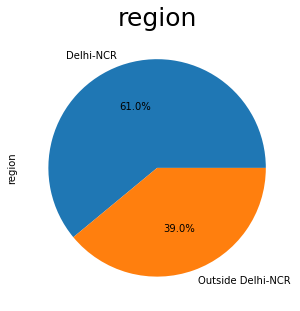

In [42]:
plt.figure(figsize=(5,5)) # Plotting a graph
df['region'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')
plt.title('region' , size = 25)

**Observations :**
 - There are total **61%** of students from **Delhi-NCR** region.
 - There are total **39%** of students from **Outside Delhi-NCR** region.

### 2 Agewise distribution of students.

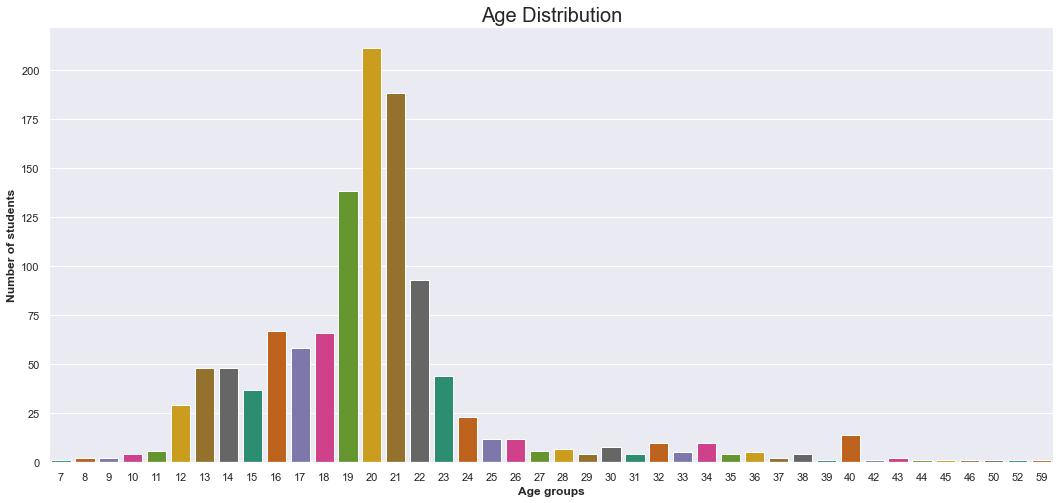

In [43]:
plt.figure(figsize=(18, 8))
sns.set(style='darkgrid')
plot1 = sns.countplot(x='age', data=df, palette= 'Dark2')
plt.title('Age Distribution', size= 20)
plt.xlabel('Age groups', weight='bold')
plt.ylabel('Number of students', weight='bold')
plt.show()

**Observations :**
 - We Can immediately see that most of the students answered the survey fall in the category of 13-25.
 - Also we can see that Highest number of students are 20 years old, so maybe they are in college and universities.
 - There are even students from age 40 to 59.

### 3. Online class rating distribution

In [44]:
df['rating_online_class'].unique()

array(['Good', 'Excellent', 'Very poor', 'Average', 'Poor'], dtype=object)

In [45]:
df['rating_online_class'].value_counts()

Very poor    437
Average      387
Good         230
Excellent     98
Poor          30
Name: rating_online_class, dtype: int64

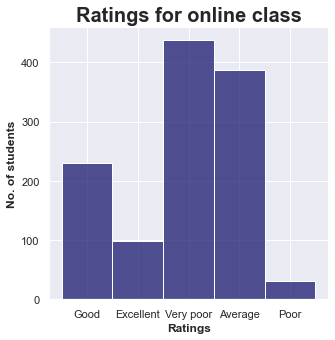

In [46]:
plt.figure(figsize=(5,5))
sns.histplot(df, x = df['rating_online_class'], color = 'midnightblue')
plt.title('Ratings for online class',weight='bold', size = 20)
plt.xlabel('Ratings',weight='bold')
plt.ylabel('No. of students',weight='bold')
plt.show()

**Observations :**

 - We have exactly **437** students who states that the class is being held is very poor.
 - Below that we have **387** students who states that the class is Average.
 - 30 students says its poor.
 - Apart from this **230** students & **98** student says their class is good and excellent repectively.

### 4.Time spent on study :

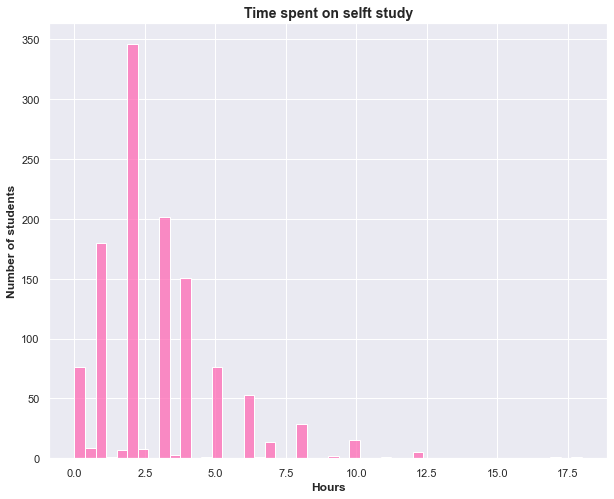

In [49]:
plt.figure(figsize=(10,8))
sns.histplot(df, x = df['time_self_study'], color = 'hotpink')
plt.title('Time spent on selft study',weight='bold', size = 14)
plt.xlabel('Hours',weight='bold')
plt.ylabel('Number of students',weight='bold')
plt.show()

#### Observations :

 - Around 1 to 3 hours students averagly spend on their studies.
 - We have **346** students who spends 2 hours on their studies. These are must be self aware students of the university/college.
 - There are students who spends more than 5/7 hours on studies.
 - There are 15 students who spends 10 hours on self studies. 5 students spends 12 hours.
 - Lastly we see there are two students who spends 17, 18 hours on self studies respectively.

### 5. Popular social media platforms :

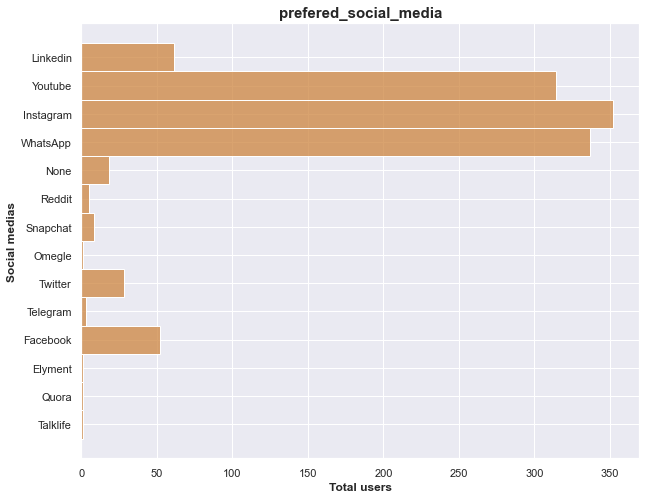

In [50]:
plt.figure(figsize=(10,8))
sns.histplot(df, y = df['prefered_social_media'], color = 'peru')
plt.title('prefered_social_media',weight='bold',size = 15)
plt.xlabel('Total users'  ,weight='bold')
plt.ylabel('Social medias',weight='bold')
plt.show()

**Observation:**

 - We can see there are total 14 social media platforms are popular among students.
 - We will choose the top 5 - the most used platforms by students.
 - That would be easy for analysis.

In [51]:
top5_social = df['prefered_social_media'].value_counts().nlargest(5)
top5_social

Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Name: prefered_social_media, dtype: int64

### 6. Top 5 Social media platforms 

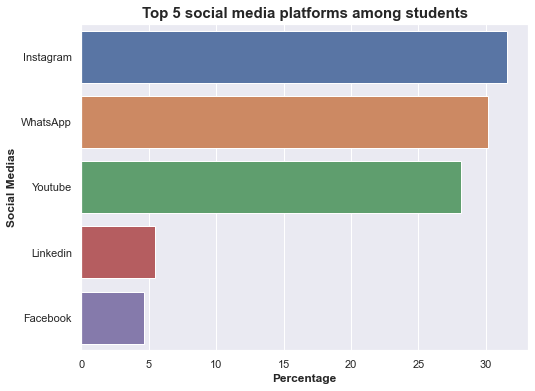

In [53]:
per = top5_social*100   ## Taking percentage.....
per /= top5_social.sum()


plt.figure(figsize=(8,6))
sns.barplot(data = df, x = per , y = per.index)
plt.title('Top 5 social media platforms among students',weight='bold', size = 15)
plt.xlabel('Percentage'  ,weight='bold')
plt.ylabel('Social Medias',weight='bold')
plt.show()

**Observation:**

 - As we obsereved earlier, more than 31 % students prefer using Instagram.
 - Also Usage of WhatsApp is also about 30 % as this platform helps them to connect with friends and family easily.
 - Now YouTube is 3rd in the list, although it is not considered a well-defined social media but many students are sharing          thier artworks.

### 6.Time spend on social media :

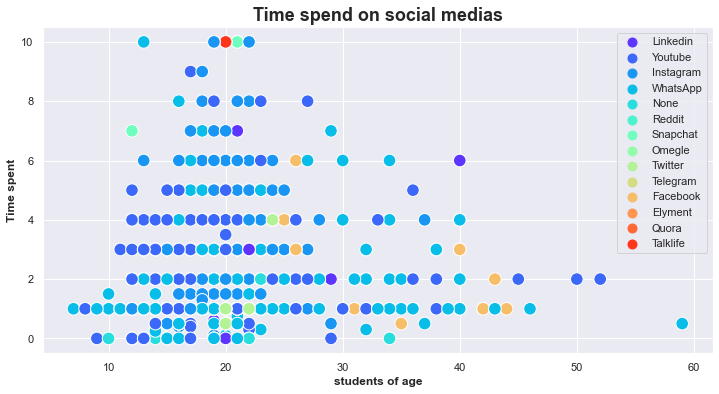

In [54]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df, x = 'age', y = 'time_social_media', hue='prefered_social_media' ,s =160,palette ='rainbow')
plt.title('Time spend on social medias',weight='bold',size = 18)
plt.xlabel('students of age'  ,weight='bold')
plt.ylabel('Time spent',weight='bold')
plt.legend(markerscale = 1.5)
plt.show()

### Observation:
 - Age group from 12 to 25 seems to be spending a lot of time on social media during covid-19.
 - There are people who actually spends 10 hours on social medias.
 - 10 hours is the most highest time spend on social media, among youngsters.
 - Even there are people of age 27 to 34 spending time 7 to 8 hours on these medias.
 

### 7. Time spent on self study :

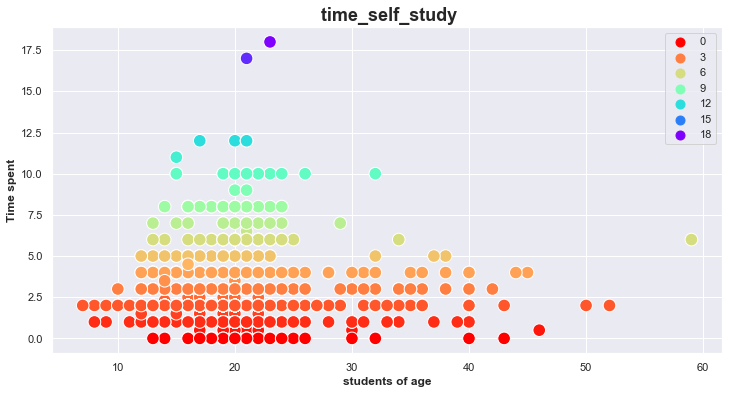

In [55]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df, x = 'age', y = 'time_self_study', hue='time_self_study' ,s =160,palette ='rainbow_r')
plt.title(' time_self_study',weight='bold',size = 18)
plt.xlabel('students of age'  ,weight='bold')
plt.ylabel('Time spent',weight='bold')
plt.legend(markerscale = 1.5)
plt.show()

### Observation:

 - Average time spent on studies is 2-3 hours.
 - Students under age of 15 to 25 spends most time on their studies.
 - Heighest time spent on the self studies is 17-18 hours.
 - Even people of age 30 to 40 spends 4 to 5 hours on self studies.

### 8. Do students find themselves MORE Connected with their Family/Close Frinds ?

In [56]:

df['more_family_connected'].value_counts()

YES    831
NO     351
Name: more_family_connected, dtype: int64

Text(0.5, 1.0, 'more_family_connected')

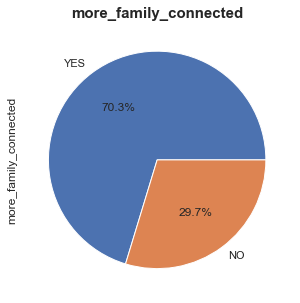

In [57]:
plt.figure(figsize=(5,5)) # Plotting a graph
df['more_family_connected'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')
plt.title('more_family_connected',weight='bold',size = 15)

#### Observation:
- 70.3% people says YES, they do feel connected with the family/friends.
- 29.7 almost 30% are not satisfied, their answer is NO.

### 9. How many students think they utilize their time

In [58]:
df['time_utilized'].value_counts()

NO     608
YES    574
Name: time_utilized, dtype: int64

Text(0.5, 1.0, 'time_utilized')

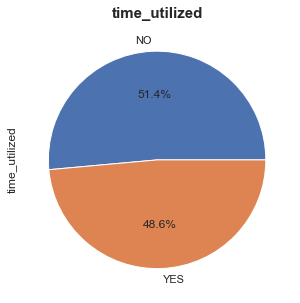

In [59]:
plt.figure(figsize=(5,5)) # Plotting a graph
df['time_utilized'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')
plt.title('time_utilized',weight='bold',size = 15)

#### Observation:

 - It is a good thing that close to 50 % students think that they are utilising their time

### 10.What students are missing most during covid-19 :

In [60]:
per = df['miss_most'].value_counts()*100/df['miss_most'].value_counts().sum()

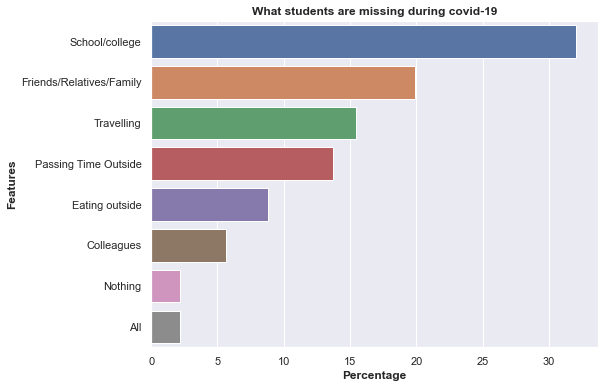

In [61]:
plt.figure(figsize=(8,6))
sns.barplot(data = df, x = per , y = per.index)
plt.title('What students are missing during covid-19',weight='bold')
plt.xlabel('Percentage'  ,weight='bold')
plt.ylabel('Features',weight='bold')
plt.show()

#### Observation:

 - So the 33% of the overall data, students are missing their schools & colleges.
 - Then 19% students are missing their Friends and family or relatives.
 - There are 9% - 14% students who are eating outside or missing Passing time outside we can say in a straight manner.
 - 5.6% students miss their colleagues.
 - Lastly we see 2.19% students who claims they are missing Nothing.
 - Same percentile of students who claims they are missing All.

### 11.Effects of pandemic on student's weights :

In [62]:
df['delta_weight'].unique()
 

array(['Increased', 'Decreased', 'Remain Constant'], dtype=object)

In [63]:
df['delta_weight'].value_counts()

Remain Constant    535
Increased          438
Decreased          209
Name: delta_weight, dtype: int64

Text(0.5, 1.0, 'delta_weight')

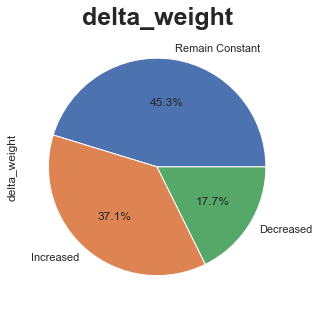

In [64]:
plt.figure(figsize=(5,5)) # Plotting a graph
df['delta_weight'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')
plt.title('delta_weight',weight='bold', size = 25)

#### Observation :
 - 45.3% students claims there is no gain in their weight during lockdown/covid-19.
 - 37.1% students claims they do have gained weight.
 - 17.7% says they have lost their weight.

### 12.Student's favourite stress busters :

In [65]:
df['stress_busters'].unique()

array(['Cooking', 'Social Media', 'Music', 'Internet Surfing',
       'Many Things', 'Doing Extra Activities', 'Online gaming',
       'Talking', 'Sleeping', 'Exercise/Gym'], dtype=object)

In [66]:
labels = df['stress_busters'].value_counts()

Text(0, 0.5, 'Features')

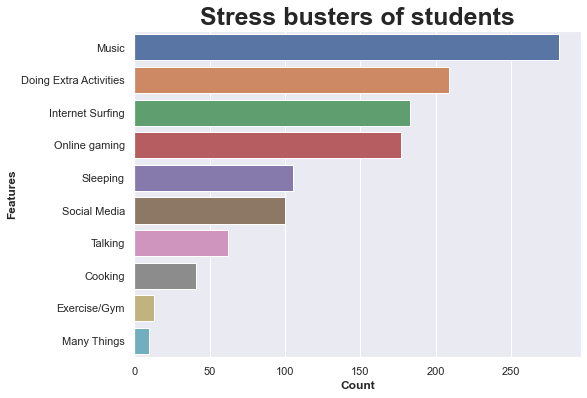

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(data = df, x = labels , y = labels.index)
plt.title('Stress busters of students',weight='bold',size = 25)
plt.xlabel('Count' ,weight='bold')
plt.ylabel('Features',weight='bold')

**Observation :**
 - As we all know that Music heals our body, mind, soul and spirit, so it is quite expected that most students rely on Music to    overcome their stress.
 - Now during these times many students too over some hobbies which are represented by 'Doing Extra Activities' which helped        them to overcome stress such as drawing, writing, sketching etc. that is why it may be second on the list
 - Also Internet Surfing is third on list which suggests that their are many students who surf the internet and look for more      information and entertainment sources to bust their stress
 - During the pandemic many kind of Online games have gained popularity like PUBG, Among Us, Getting Over It etc. So it is clear    that many students used these Online games to lower down their stress levels.

_______________________________________________________________________________________________________________________________

## Inferences and Conclusion
Here is summary of all the inferences drawn from this analysis, and any conclusions we have drawn by answering various questions:

 - Based on survey we see that most of the students answered the survey fall in the category of 15-25 which is basically the        best phase of a student's life.
 - We Also went on the rating of online classes according to students which resulted not so good because almost 75% students are    saying that Online Classes are not Good Enough.
 - According to the basic analysis close to 50 % students think that they are utilising their time which is quite good.
 - We did quite a long analysis on Time Spend by students which mainly suggested that the timeline of students is distorted due    to Covid-19 Pandemic and they are not able to enjoy their life as they would've if there was not pandemic.
 - We also found out that students are not being able to give time to studies neither online classes nor self-study.
 - Now in Social Media prespective we found that Instagram and WhatsApp are the most popular among Students which is quite          expected and not that bizzare.
 - Due to pandemic majority of the students feel more connected to their family/close friends because lockdown has given them      opportunity to spend quality time with them which was not that high during normal times.
 - According to the data Students are missing School and College the most (more than 30%). Morevover about 20% students are        missing their families, friends and relatives, this suggests that many students are separated from their families, friends      and relatives due to pandemic.
 - We Also found out that about 45% students reported no change in their weight whereas 37% reported a weight gain and 18%          students reported weight loss.
 - Finally we infer that Music is the best Stress-Busters among students followed by Extra-Activities such as drawing, writing,    sketching etc. and then Internet Surfing is third on list for entertainment sources, also Online Gaming have also gained        popularity among students for beating stress.